# Proyecto Final: Aprendizaje No Supervisado PCA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

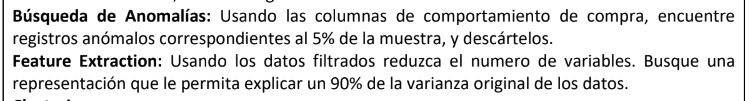

In [21]:
df = pd.read_csv('evaluacion_mkt_campaign.csv', sep=',')
df

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1
2212,4001,64014.0,56,406,30,0,0,8,7,8,2,5,7,69,87,3
2213,7270,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0
2214,8235,69245.0,8,428,214,80,30,61,2,6,5,10,3,59,342,1


In [22]:
# Setear ID como indice
df.set_index('ID', inplace=True)

In [23]:
df = pd.DataFrame(data)
print('Dimensiones del df:', df.shape)

# Vamos a sacar informacion sobre los tipos y nulos del df
df.drop_duplicates(inplace = True)
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'tipo de la columna'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'campos nulos (%)'}))
display(tab_info)
#__________________
#
display(df[:5])
print(df.describe())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 5524 to 9405
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Recency              2216 non-null   int64  
 2   MntWines             2216 non-null   int64  
 3   MntMeatProducts      2216 non-null   int64  
 4   MntFishProducts      2216 non-null   int64  
 5   MntSweetProducts     2216 non-null   int64  
 6   MntGoldProds         2216 non-null   int64  
 7   NumDealsPurchases    2216 non-null   int64  
 8   NumWebPurchases      2216 non-null   int64  
 9   NumCatalogPurchases  2216 non-null   int64  
 10  NumStorePurchases    2216 non-null   int64  
 11  NumWebVisitsMonth    2216 non-null   int64  
 12  Age                  2216 non-null   int64  
 13  Seniority            2216 non-null   int64  
 14  Children             2216 non-null   int64  
dtypes: float64(1), int64(14)
memory usa

In [26]:
columnas_compras = ['NumDealsPurchases','NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases']
df[columnas_compras].describe()

,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumCatalogPurchases
count,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,5.800993,4.085289,2.671029
std,1.923716,3.250785,2.740951,2.926734
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000
50%,2.000000,5.000000,4.000000,2.000000
75%,3.000000,8.000000,6.000000,4.000000
max,15.000000,13.000000,27.000000,28.000000


In [27]:
# sumar las columans de compras
df['TotalPurchases'] = df[columnas_compras].sum(axis=1)
df['TotalPurchases'].describe()

count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalPurchases, dtype: float64

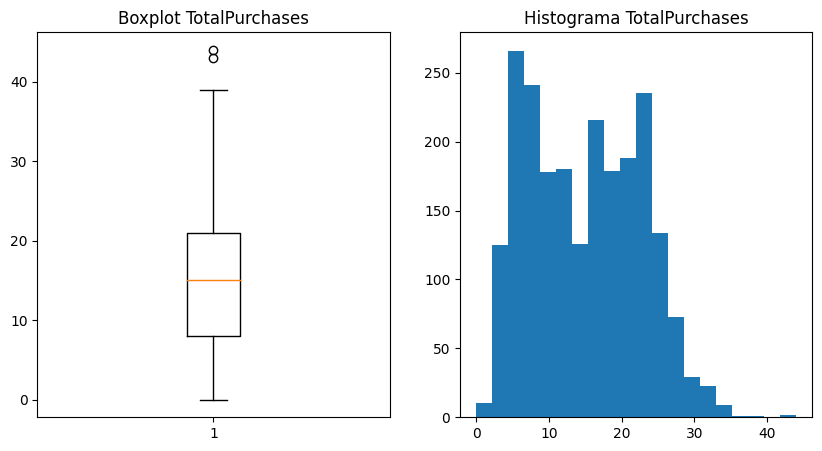

In [28]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(df['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [29]:
#filtrar el 5% de datos anomalos de TotalPurchases
q = df['TotalPurchases'].quantile(0.95)
df_filtrado = df[df['TotalPurchases'] < q]
df_filtrado

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children,TotalPurchases
ID,,,,,,,,,,,,,,,,
5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0,25
2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2,6
4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0,21
6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1,8
5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,61223.0,46,709,182,42,118,247,2,9,3,4,5,48,567,1,18
4001,64014.0,56,406,30,0,0,8,7,8,2,5,7,69,87,3,22
7270,56981.0,91,908,217,32,12,24,1,2,3,13,6,34,341,0,19


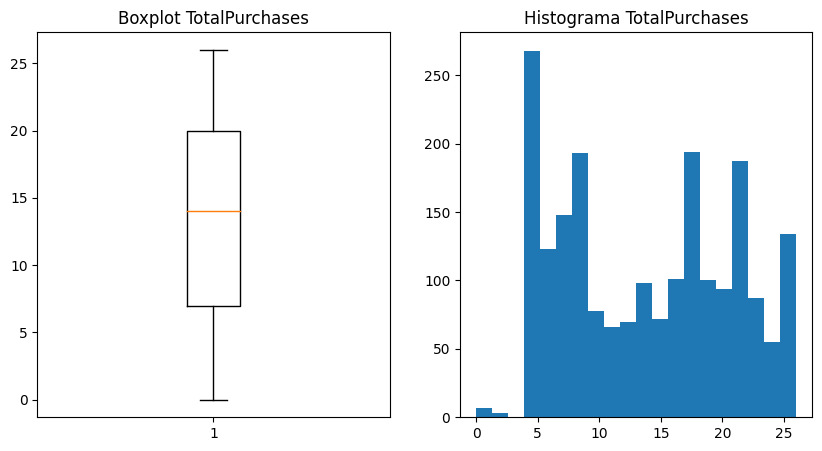

In [30]:
# graficar boxplot de TotalPurchases y histograma
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(df_filtrado['TotalPurchases'])
axs[0].set_title('Boxplot TotalPurchases')
axs[1].hist(df_filtrado['TotalPurchases'], bins=20)
axs[1].set_title('Histograma TotalPurchases')
plt.show()

In [32]:
# genear X con drop de TotalPurchases, Income
X = df_filtrado.drop(['TotalPurchases', 'Income'], axis=1)
y = df_filtrado['Income']

In [33]:
from sklearn.decomposition import PCA

In [34]:
# estandarizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.30433126,  1.08431224,  1.8112294 , ...,  0.99423037,
         2.0079743 , -1.26483491],
       [-0.38587377, -0.82908047, -0.70132677, ...,  1.24412079,
        -1.64207039,  1.38870062],
       [-0.79999679,  0.44344833, -0.13832807, ...,  0.32785591,
        -0.14494804, -1.26483491],
       ...,
       [ 1.44316957,  1.92142155,  0.28043129, ..., -1.004893  ,
        -0.8223204 , -1.26483491],
       [-1.42118133,  0.449581  ,  0.26647264, ...,  1.07752718,
        -0.81800593,  0.06193286],
       [-0.31685327, -0.60523806, -0.44541827, ...,  1.24412079,
         1.19253878,  1.38870062]])

In [36]:
pca = PCA(n_components=0.9)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

n_components = X_pca.shape[1]

Number of components: 10


In [42]:
print(f'Number of components: {n_components}')
print(f'Explained variance: {pca.explained_variance_ratio_.sum()}')

Number of components: 10
Explained variance: 0.9177784955020832


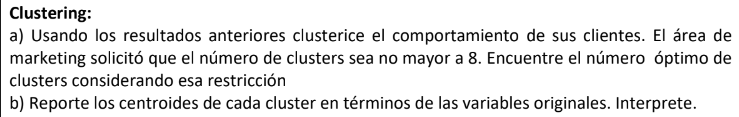

In [48]:
# import k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

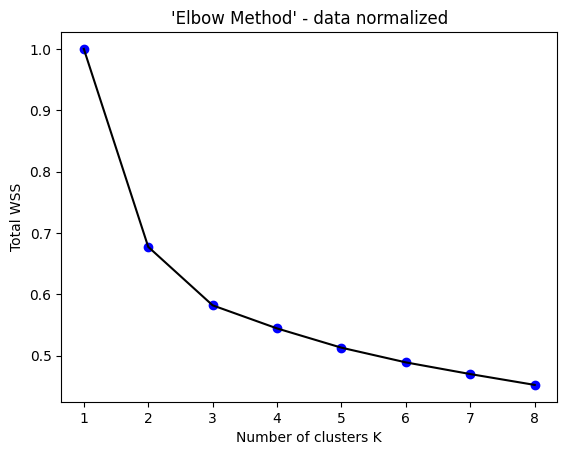

In [45]:
k_max = 8  # Número máximo de clusters a probar
wss = np.zeros(k_max)

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wss[k-1] = kmeans.inertia_
wss/=wss.max() # Normalizamos los valores de WSS

plt.figure()
plt.plot(range(1, k_max + 1), wss, color='black')
plt.scatter(range(1, k_max + 1), wss, color='blue')
plt.title("'Elbow Method' - data normalized")
plt.xlabel("Number of clusters K")
plt.ylabel("Total WSS")
plt.show()

In [93]:
# range of cluster numbers to try
k_max = 8
min_clusters = 2
max_clusters = 8

# Sum of Squared Errors and silhouette scores
sse = np.zeros(k_max)
silhouette_scores = np.zeros(k_max)

for k in range(min_clusters, max_clusters + 1):

    print(f'Clustering with {k} clusters...')

    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,
    )
    
    kmeans.fit(X_pca)
    
    # Calculate SSE (Sum of Squared Errors)
    sse[k-1] = kmeans.inertia_
    
    # Calculate Silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k-1] = score

Clustering with 2 clusters...
Clustering with 3 clusters...
Clustering with 4 clusters...
Clustering with 5 clusters...
Clustering with 6 clusters...
Clustering with 7 clusters...
Clustering with 8 clusters...


In [94]:
silhouette_scores.shape , sse.shape , wss.shape

((8,), (8,), (8,))

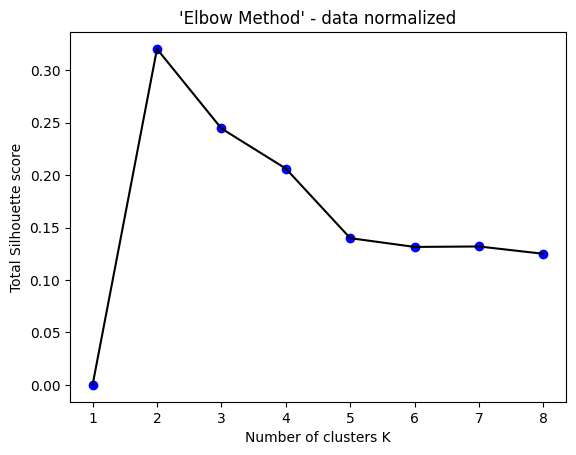

In [98]:
plt.figure()
plt.plot(range(1, max_clusters + 1), silhouette_scores, color='black')
plt.scatter(range(1, max_clusters + 1), silhouette_scores, color='blue')
plt.title("'Elbow Method' - data normalized")
plt.xlabel("Number of clusters K")
plt.ylabel("Total Silhouette score")
plt.show()